In [7]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

In [11]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
inertia = []
k_values = range(1, 11)

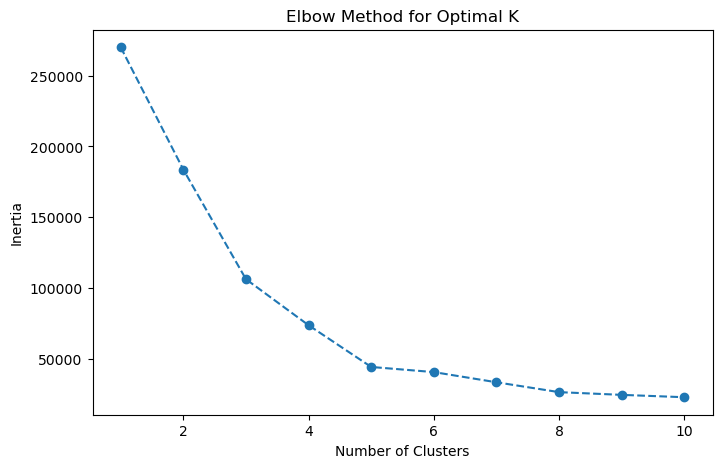

In [15]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

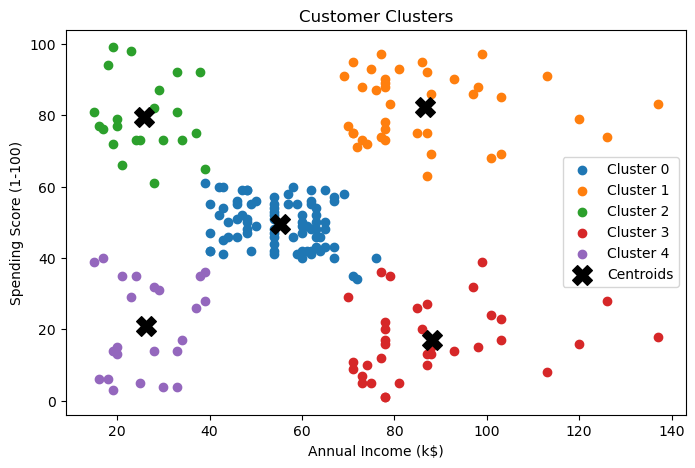

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [17]:
optimal_clusters = 5  # Example choice, adjust based on the elbow plot

# Applying K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_clusters):
    plt.scatter(
        X[data['Cluster'] == cluster]['Annual Income (k$)'],
        X[data['Cluster'] == cluster]['Spending Score (1-100)'],
        label=f'Cluster {cluster}'
    )

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Displaying the first few rows of the updated dataset
data.head()
